# Exploration wells

- <https://data.marine.ie/geonetwork/srv/eng/catalog.search#/metadata/ie.marine.data:dataset.2171>
- <https://data.gov.ie/dataset/exploration-wells-in-the-irish-offshore>

In [1]:
import os
from zipfile import ZipFile

import contextily as cx
import matplotlib.pyplot as plt

from h2ss import data as rd

In [10]:
plt.rcParams["xtick.major.size"] = 0
plt.rcParams["ytick.major.size"] = 0

In [2]:
# base data download directory
DATA_DIR = os.path.join("data", "exploration-wells")

FILE_NAME = "Exploration_Wells_Irish_Offshore.shapezip.zip"

URL = f"https://atlas.marine.ie/midata/EnergyResourcesExploration/{FILE_NAME}"

DATA_FILE = os.path.join(DATA_DIR, FILE_NAME)

# basemap cache directory
cx.set_cache_dir(os.path.join("data", "basemaps"))

In [3]:
rd.download_data(url=URL, data_dir=DATA_DIR, file_name=FILE_NAME)

Data 'Exploration_Wells_Irish_Offshore.shapezip.zip' already exists in 'data/exploration-wells'.
Data downloaded on: 2023-09-15 12:56:05.840492+00:00
Download URL: https://atlas.marine.ie/midata/EnergyResourcesExploration/Exploration_Wells_Irish_Offshore.shapezip.zip
SHA256 hash: 9a40c29082e359932b238828fe94ec1334f4fc2b5ea643648e47eeb7aeaa8949



In [4]:
ZipFile(DATA_FILE).namelist()

['Exploration_Wells_Irish_Offshore.shapezip/',
 'Exploration_Wells_Irish_Offshore.shapezip/Exploration_Wells_Irish_Offshore.cpg',
 'Exploration_Wells_Irish_Offshore.shapezip/Exploration_Wells_Irish_Offshore.dbf',
 'Exploration_Wells_Irish_Offshore.shapezip/Exploration_Wells_Irish_Offshore.prj',
 'Exploration_Wells_Irish_Offshore.shapezip/Exploration_Wells_Irish_Offshore.sbn',
 'Exploration_Wells_Irish_Offshore.shapezip/Exploration_Wells_Irish_Offshore.sbx',
 'Exploration_Wells_Irish_Offshore.shapezip/Exploration_Wells_Irish_Offshore.shp',
 'Exploration_Wells_Irish_Offshore.shapezip/Exploration_Wells_Irish_Offshore.shp.xml',
 'Exploration_Wells_Irish_Offshore.shapezip/Exploration_Wells_Irish_Offshore.shx']

In [5]:
wells = rd.read_shapefile_from_zip(data_path=DATA_FILE)

In [6]:
wells.shape

(173, 19)

In [7]:
wells.head()

,OBJECTID,REF_NO_,WELL_NO_,SPUD_LATID,SPUD_LONGI,DDLATITUDE,DDLONGITUD,WELL_CLASS,AREA,OPERATOR,RIG_NAME,TD__MD_,RIG_DATUM,WATER_DEPT,UNIT,SPUD_DATE,RIG_RELEAS,WELL_STATU,geometry
0,1,1,48/25-1,"51° 18' 55.100"" N","08° 03' 19.900"" W",51.3153056,-8.0555278,Exploration,North Celtic Sea Basin,Marathon,Glomar North Sea,10941,31,307,ft,1970-05-16,1971-02-25,P & A with/without shows or untested pay,POINT (-8.05708 51.31434)
1,2,2,50/11-1,"51° 34' 55.300"" N","06° 57' 18.500"" W",51.5820278,-6.9551389,Exploration,North Celtic Sea Basin,Marathon,Glomar North Sea,11906,31,236,ft,1971-02-27,1971-09-10,P & A with/without shows or untested pay,POINT (-6.95668 51.58109)
2,3,3,48/25-2,"51° 19' 39.505"" N","08° 05' 48.595"" W",51.3276403,-8.0968319,Exploration,North Celtic Sea Basin,Marathon,Glomar North Sea,6549,31,304,ft,1971-09-13,1971-11-09,P & A Gas Well,POINT (-8.09839 51.32668)
3,4,4,48/20-1A,"51° 21' 07.772"" N","08° 00' 21.764"" W",51.3521589,-8.0060456,Appraisal,North Celtic Sea Basin,Marathon,Glomar North Sea,7101,31,295,ft,1972-05-06,1972-07-25,P & A Gas Well,POINT (-8.00760 51.35120)
4,5,5,58/3-1,"50° 53' 46.693"" N","07° 35' 10.207"" W",50.8963036,-7.5861686,Exploration,South Celtic Sea Basin,Marathon,Glomar North Sea,9379,31,330,ft,1972-07-31,1972-09-23,P & A with/without shows or untested pay,POINT (-7.58770 50.89533)


In [8]:
wells.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

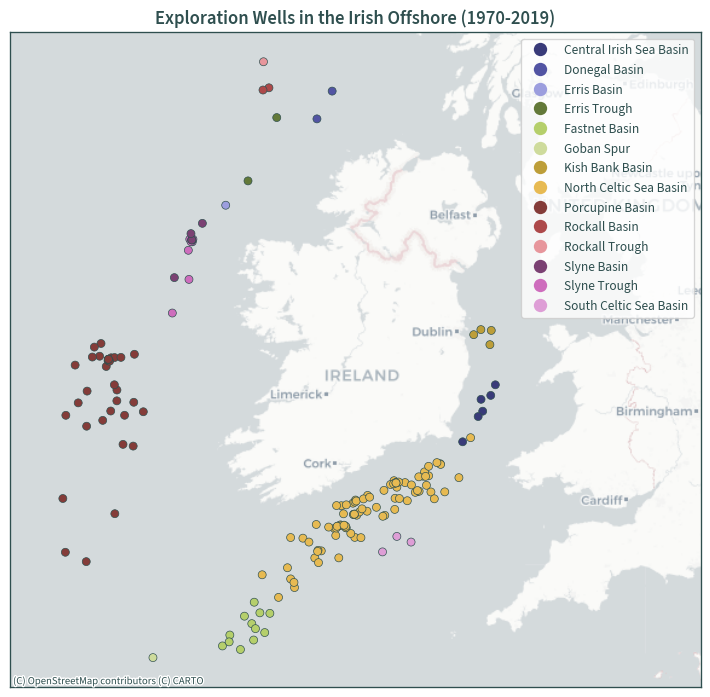

In [11]:
ax = wells.to_crs(3857).plot(
    column="AREA",
    legend=True,
    cmap="tab20b",
    figsize=(7.5, 7.5),
    legend_kwds={"loc": "upper right"},
    linewidth=0.5,
    edgecolor="darkslategrey",
)
plt.xlim(-1.6e6, -0.2e6)
cx.add_basemap(ax, source=cx.providers.CartoDB.Positron, zoom=6)

plt.title("Exploration Wells in the Irish Offshore (1970-2019)")

plt.tick_params(labelbottom=False, labelleft=False)
plt.tight_layout()
plt.show()